In [1]:
from modules.Crypto import CryptoData
from modules.utils import filter_data_by_year_month
import pandas as pd

In [2]:
btc_data = CryptoData(symbol="BTCUSDC", interval="15m")
eth_data = CryptoData(symbol="ETHUSDC", interval="15m")
xrp_data = CryptoData(symbol="XRPUSDC", interval="15m")

----------------
Prediction

In [ ]:
btc_data.show_raw_data()

In [ ]:
xrp_data.fetch_data("2025-04-09")

In [ ]:
btc_data.fetch_data("2025-04-09")
eth_data.fetch_data("2025-04-09")

In [ ]:
xrp_data.show_raw_data()

In [ ]:
btc_data.preprocess_data()

In [ ]:
eth_data.preprocess_data()

In [ ]:
xrp_data.preprocess_data()

In [ ]:
xrp_data.load_model("../models/RNN(O.5646)_high(0.55)_low_(0.44).keras")

In [ ]:
btc_data.load_model("../models/RNN(O.5646)_high(0.55)_low_(0.44).keras")


In [ ]:
btc_data.make_prediction()

-----------------------------------------
Backtesting 

In [3]:
df = pd.read_csv("/Users/elouan/A. Repo Github ElouanBahri/Predicting_crypto_prices/Historical Prices for BTCUSDT")

YEARS = [2020, 2021, 2022, 2023, 2024, 2025]

df = filter_data_by_year_month(df, YEARS)

btc_data.raw_data = df

In [4]:
btc_data.preprocess_data()

✅ Optimal number of components: 6
Data preprocessing complete.


In [5]:
btc_data.load_model("../models/RNN(O.5646)_high(0.55)_low_(0.44).keras")

You've uploaded this model :


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 256)         │       138,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 920,261 (3.51 MB)

 Trainable params: 306,753 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 613,508 (2.34 MB)

1117/1117 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
✅ Accuracy: 0.5659
📈 Sharpe Ratio: 1.07
💰 Final Capital: $12,516.81


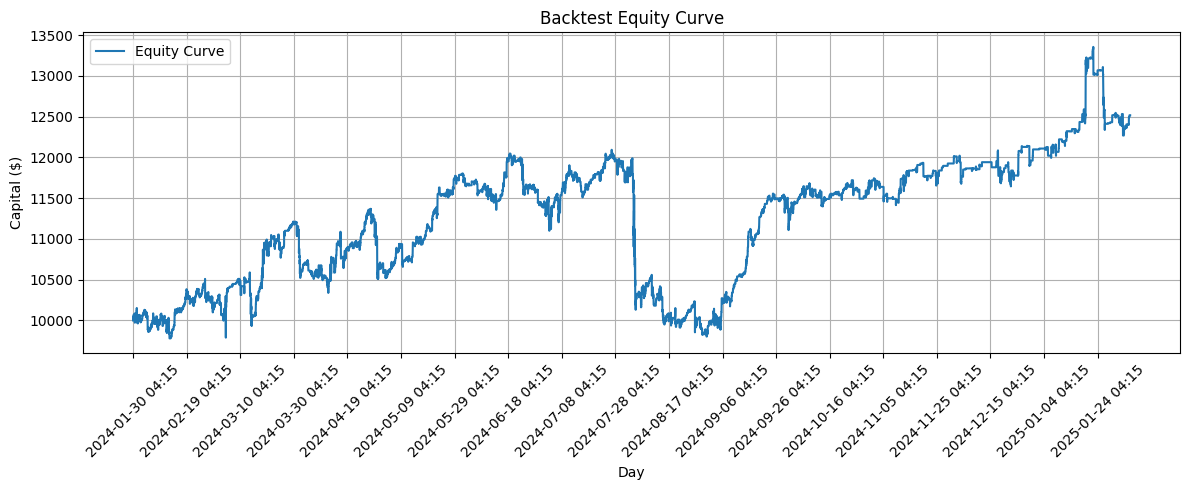

In [6]:
btc_data.backtesting()